In [1]:
# importação das bibliotecas necessarias

from sklearn.metrics import accuracy_score        # acuracia do modelo (avaliação)
from sklearn.metrics import confusion_matrix      # matriz confusão (avaliação)
from spacy.lang.pt import STOP_WORDS              # stop_word
import matplotlib.pyplot as plt                   # visualização   
import pandas as pd                               # manipulação dados
import numpy as np                                # calculos numericos
import seaborn as sns                             # visualização
import string                                     # manipulação strings
import spacy                                      # liguagem natural
import random                                     # valores aleatórios
import re                                         # expressão regular

# ignorar os warnings de depreciação de metodos
import warnings
warnings.simplefilter("ignore")

In [19]:
# carregamento da base de dados

bd_treino = pd.read_csv('./data/twitter_train.csv', delimiter=';')
bd_teste = pd.read_csv('./data/twitter_test.csv', delimiter=';')

In [5]:
# primeiros registros

bd_treino.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [6]:
# primeiros registros teste

bd_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


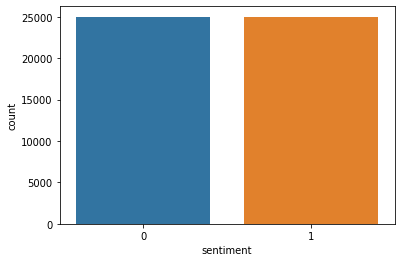

In [7]:
# visualização dos grupos ['emocao']

sns.countplot(bd_treino['sentiment'], label='Contagem');

In [6]:
# pre processamento de texto

In [20]:
# retirando os atributos que não usados

bd_treino.drop(['id', 'tweet_date', 'query_used'], inplace=True, axis=1)
bd_teste.drop(['id', 'tweet_date', 'query_used'], inplace=True, axis=1)

In [16]:
# viz após treinamento

bd_treino.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [21]:
bd_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


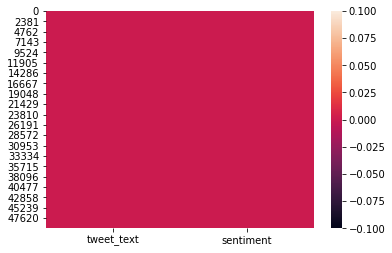

In [10]:
# viz grafico

sns.heatmap(pd.isnull(bd_treino));

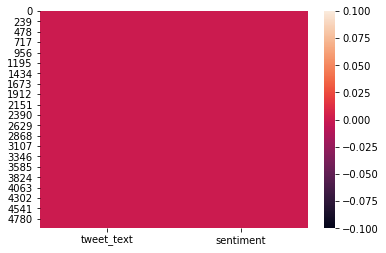

In [23]:
sns.heatmap(pd.isnull(bd_teste));

In [11]:
# modelo em portugues

pln = spacy.load('pt')
pln

In [12]:
# stop_words

stop_words = STOP_WORDS

In [26]:
def preprocessamento(text):
  # Letras minúsculas
  text = text.lower()

  # Nome do usuário
  text = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', text)

  # URLs
  text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)

  # Espaços em branco
  text = re.sub(r" +", ' ', text)

  # Emoticons
  lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    text = text.replace(emocao, lista_emocoes[emocao])

  # Lematização
  documento = pln(text)

  lista = []
  for token in documento:
    lista.append(token.lemma_)
  
  # Stop words e pontuações
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  
  return lista

In [27]:
# aplicando preprocessing

In [28]:
# tratamento com a função preprocessamento

bd_treino['tweet_text'] = bd_treino['tweet_text'].apply(preprocessamento)
bd_teste['tweet_text'] = bd_teste['tweet_text'].apply(preprocessamento)


In [11]:
# viz após preprocessing

'aprender liguagem natural python brasilia'

In [29]:
bd_treino.head()

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1


In [30]:
bd_teste.head()

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1


In [31]:
base_dados_treinamento_final = []

for texto, emocao in zip(bd_treino['tweet_text'], bd_treino['sentiment']):
  
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  base_dados_treinamento_final.append([texto, dic.copy()])

In [32]:
# viz após tratameto

base_dados_treinamento_final[5:10]

[['  amigo to emocaopositiva', {'POSITIVO': True, 'NEGATIVO': False}],
 ['  bravo jairo emocaopositiva', {'POSITIVO': True, 'NEGATIVO': False}],
 ['  socorrer ksoaksosks achar to o caixa som :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  gostar fazenda emocaopositiva morrer medo galinha kkkkkkk',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['amanhar venom emocaopositiva', {'POSITIVO': True, 'NEGATIVO': False}]]

In [33]:
# criação classificador

In [34]:
# parametros do modelo

model = spacy.blank('pt')

categorias = model.create_pipe('textcat')
categorias.add_label('POSITIVO')
categorias.add_label('NEGATIVO')
model.add_pipe(categorias)


In [56]:
# treinamento do modelo

historico = []
model.begin_training()

for epoch in range(5):
    
    random.shuffle(base_dados_treinamento_final)
    losses = {}

    for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
        
        textos = [model(texto) for texto, entities in batch]
        annotations = [{'cats':entities} for texto, entities in batch]
        model.update(textos, annotations, losses=losses)
        historico.append(losses)

    if epoch % 5 == 0:
        print(losses)

{'textcat': 6.629547314986505e-07}


In [57]:
 # lista com losses do modelo

historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [58]:
# conversão para array a lista de erros

historico_loss = np.array(historico_loss)
historico_loss

array([6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
       6.62954731e-07, 6.62954731e-07, 6.62954731e-07, 6.62954731e-07,
      

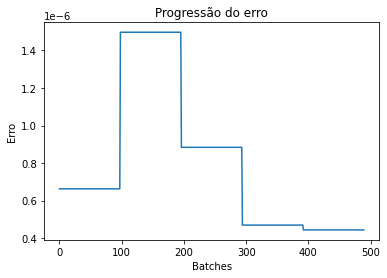

In [59]:
# viz erro

plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')
plt.show();

In [60]:
# salvando modelo

model.to_disk('./data/modelo_twitter')

In [61]:
# carregando modelo

model_carregado = spacy.load('./data/modelo_twitter')
model_carregado

In [62]:
# texto positivo

texto_positivo = bd_teste['tweet_text'][21]
texto_positivo

'  ficar feliz q recíproco emocaopositiva'

In [63]:
# previsão

prev = model_carregado(texto_positivo)
prev

  ficar feliz q recíproco emocaopositiva

In [64]:
# categorias da previsão

prev.cats

{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05}

In [65]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gostar'

In [66]:
model_carregado(texto_positivo).cats

{'POSITIVO': 0.012623820453882217, 'NEGATIVO': 0.9943988919258118}

In [67]:
# texto negativo

bd_teste['tweet_text'][4000]

'tô triste filmar mulan o mushu emocaonegativa'

In [68]:
# previsão texto negativo

texto_negativo = bd_teste['tweet_text'][4000]
previsao = model_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 5.4001608077669516e-05, 'NEGATIVO': 0.9999545812606812}

In [69]:
# Avaliação do modelo

In [70]:
# previsões base teste

previsoes = []

for texto in bd_teste['tweet_text']:

  previsao = model_carregado(texto)
  previsoes.append(previsao.cats)

In [71]:
# previsao base_teste

previsoes_final = []

for previsao in previsoes:

  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [72]:
# conversão array

respostas_reais = bd_teste['sentiment'].values

In [73]:
# acuracia modelo

accuracy_score(respostas_reais, previsoes_final)

0.9976

<AxesSubplot:>

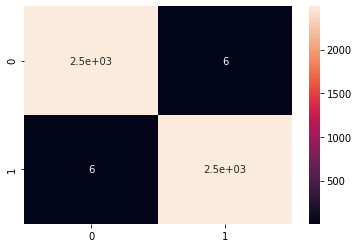

In [74]:
# matriz de confusão

cm = confusion_matrix(respostas_reais, previsoes_final)
sns.heatmap(cm, annot=True)